In [106]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [107]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.89869517 0.15988366 0.11953334 0.09091131 0.07636204]


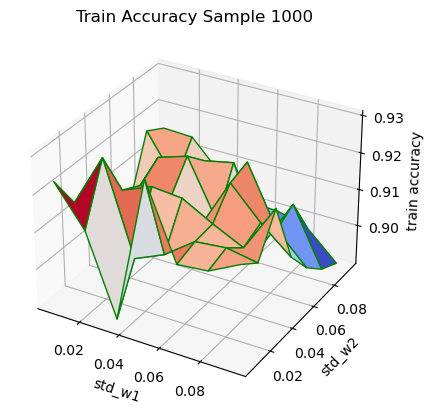

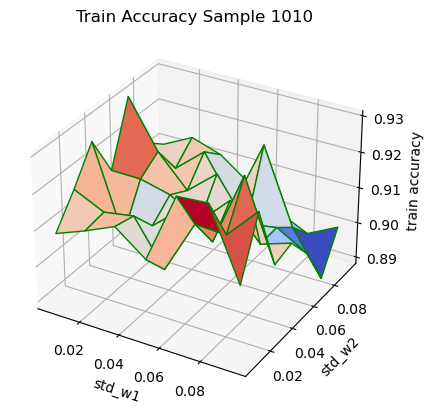

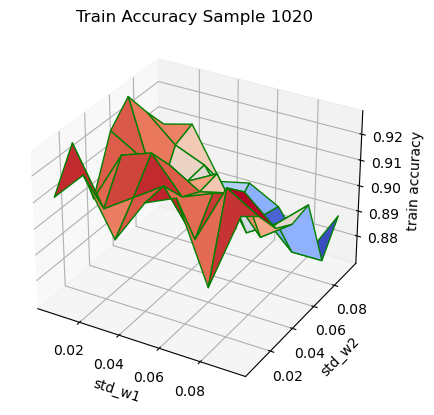

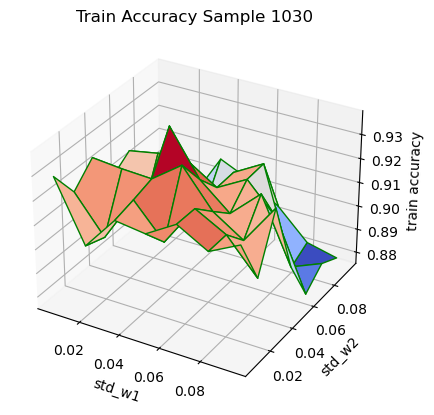

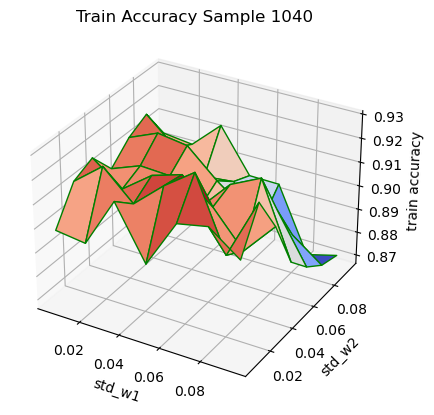

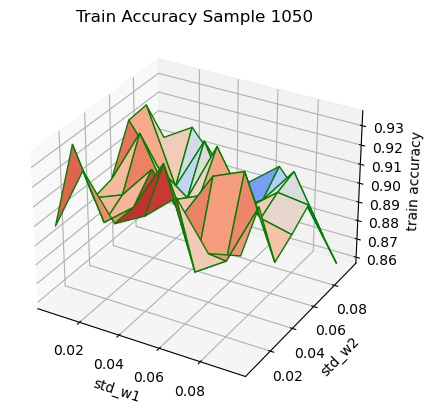

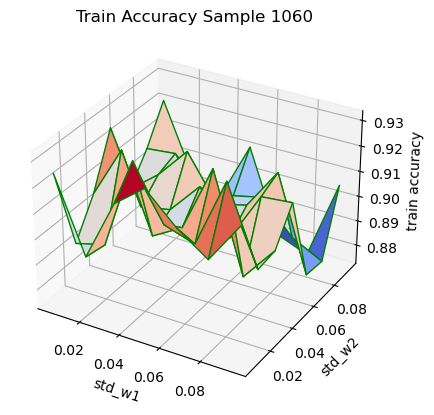

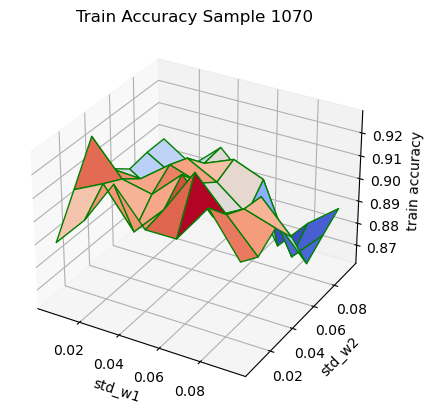

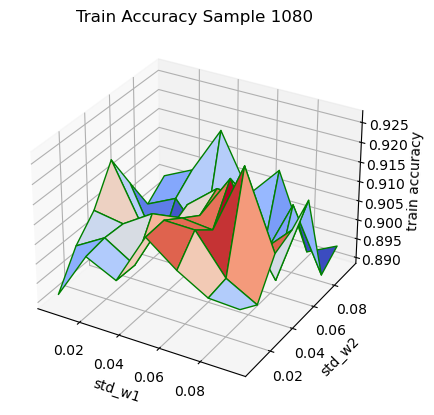

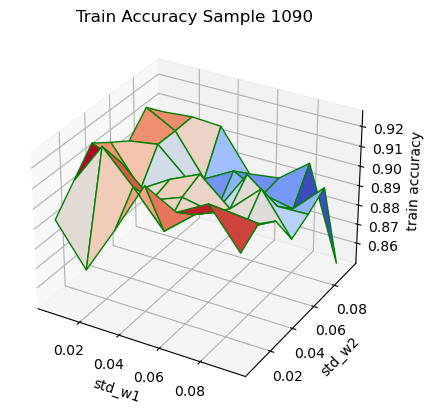

In [108]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['train_accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('train accuracy')
    ax.set_title('Train Accuracy Sample {}'.format(sample))
    fig.savefig("train_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            train_accuracy_10_samples[i][j][k]= data['train_accuracy_w1_w2'][j][k]

In [109]:
data['train_accuracy_w1_w2'].shape

(7, 7)

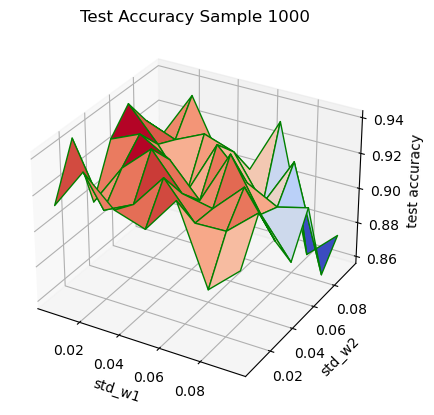

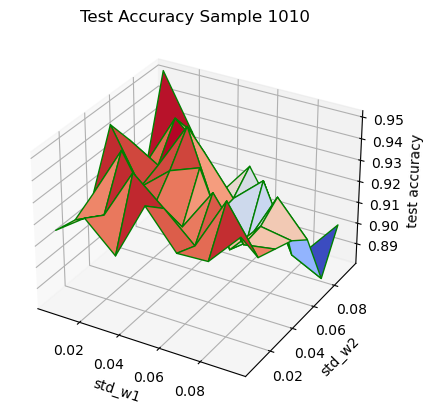

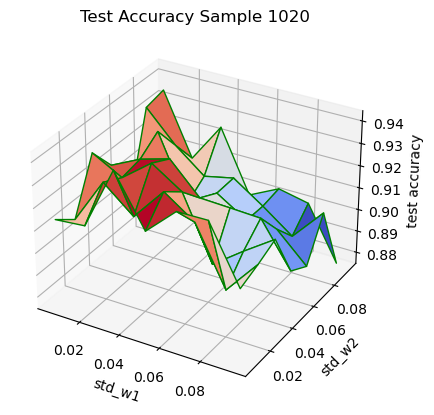

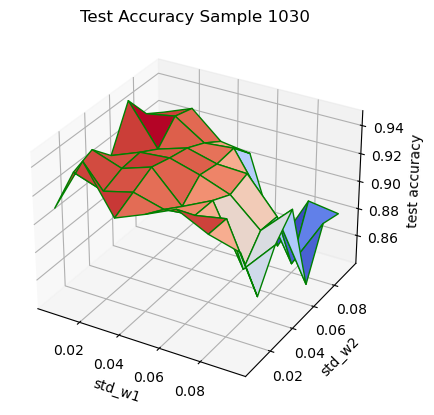

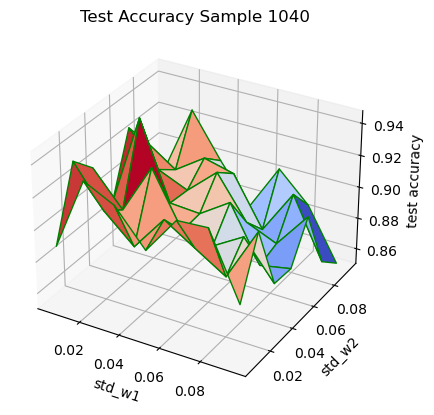

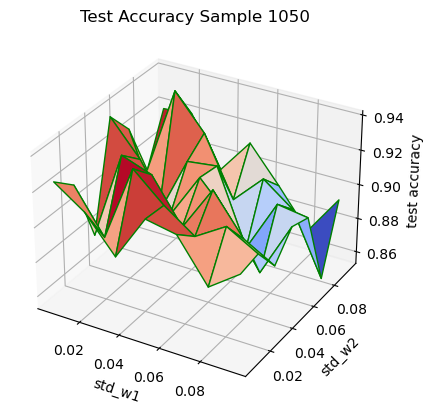

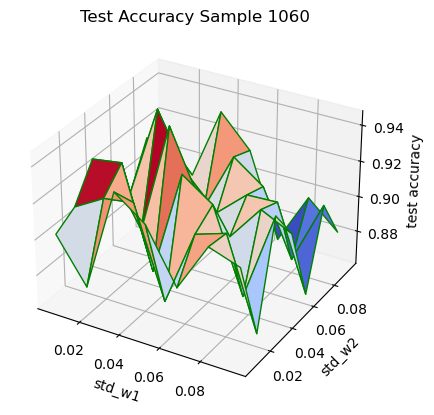

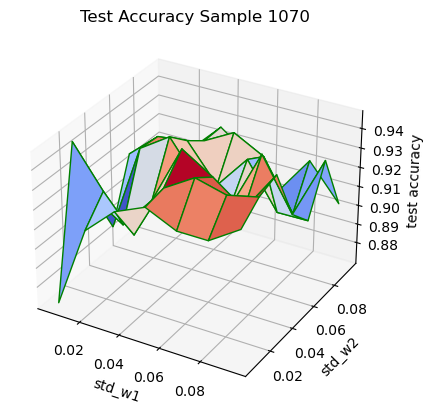

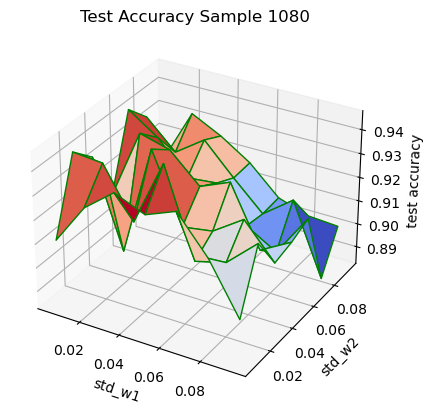

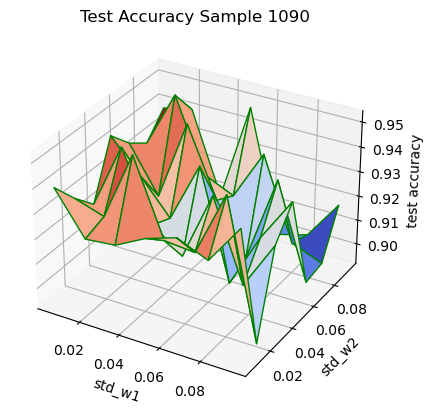

In [110]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['test_accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('test accuracy')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [111]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [112]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [113]:
train_accuracy_10_samples.shape

(10, 7, 7)

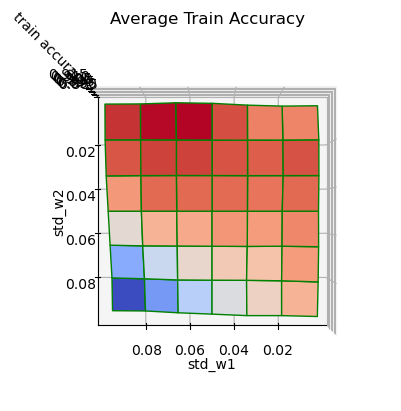

In [114]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_train_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('train accuracy')
ax.set_title('Average Train Accuracy')
ax.view_init(90,90)

fig.savefig("average_train_accuracy_grid_over_10_samples.png".format(sample))

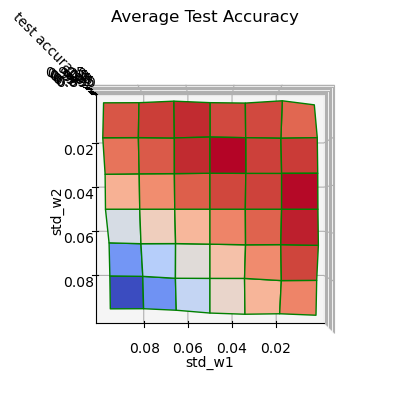

In [115]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('test accuracy')
ax.set_title('Average Test Accuracy')
ax.view_init(90,90)

fig.savefig("average_test_accuracy_grid_over_10_samples.png".format(sample))

In [116]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [117]:
best_w1_w2

(0, 4)

In [118]:
average_train_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_train_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [119]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False,  True, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [120]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [121]:
test_best_w1_w2

(0, 1)

In [122]:
best_w1_best_w2 = np.array(best_w1_w2)*0.015+0.005

In [123]:
test_best_w1_best_w2 = np.array(test_best_w1_w2)*0.015+0.005

In [124]:
best_w1_best_w2

array([0.005, 0.065])

In [125]:
test_best_w1_best_w2

array([0.005, 0.02 ])

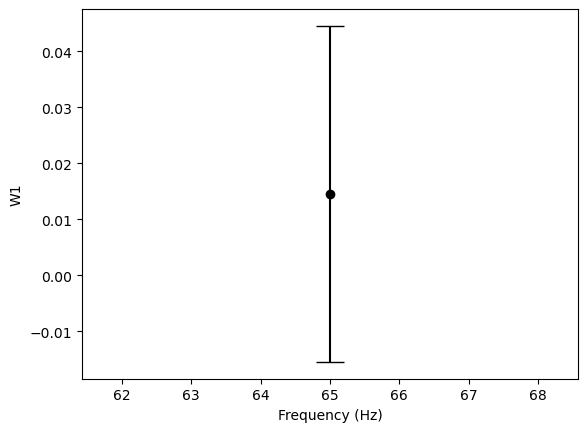

In [126]:
fig2, ax2 = plt.subplots()
ax2.scatter(65, best_w1_best_w2[0]/0.3445, color="k")
ax2.errorbar(65, best_w1_best_w2[0]/0.3445, 2*0.015, capsize=10, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W1")
fig2.savefig("train_accuracy_frequency65forW1.png")

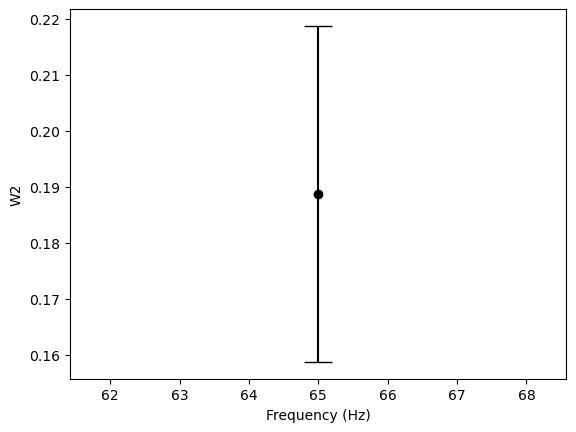

In [127]:
fig2, ax2 = plt.subplots()
ax2.scatter(65, best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(65, best_w1_best_w2[1]/0.3445, 2*0.015, capsize=10, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency65forW2.png")

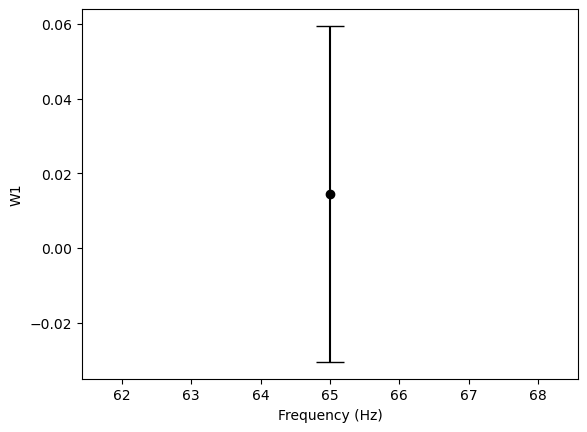

In [128]:
fig2, ax2 = plt.subplots()
ax2.scatter(65, test_best_w1_best_w2[0]/0.3445, color="k")
ax2.errorbar(65, test_best_w1_best_w2[0]/0.3445, 3*0.015, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W1")
fig2.savefig("test_accuracy_frequency65forW1.png")

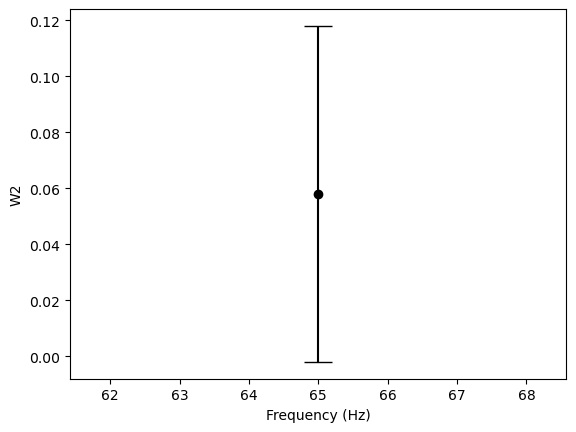

In [129]:
fig2, ax2 = plt.subplots()
ax2.scatter(65, test_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(65, test_best_w1_best_w2[1]/0.3445, 4*0.015, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("test_accuracy_frequency65forW2.png")

In [130]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy']=max_accuracy
data['w1'] = best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.015
data['w2'] = best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.015
np.savez("train_accuracy_65_frequency_neurons_w1_w2.npz",**data)

In [131]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 4*0.015
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 4*0.015
np.savez("test_accuracy_65_frequency_neurons_w1_w2.npz",**data)